In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
from scipy.optimize import minimize
from scipy.stats import linregress

vss_sse_df = pd.read_csv('../data/cleaned_vss452_sse.csv').set_index('Unnamed: 0')
csd_sse_df = pd.read_csv('../data/cleaned_csd76_sse.csv').set_index('Unnamed: 0')

vss_df = pd.read_csv('../data/VSS-452.csv').set_index('name')
csd_df = pd.read_csv('../data/CSD-76.csv')
to_remove = []
for idx, row in csd_df.iterrows():
    if 'Cr' in row['name']:
        to_remove.append(idx)
csd_df = csd_df.drop(to_remove)
csd_df = csd_df.set_index('name')

vss_pbe_sse = vss_sse_df.drop([key for key in vss_sse_df.keys() if 'scan' in key], axis=1)
vss_scan_sse = vss_sse_df.drop([key for key in vss_sse_df.keys() if 'pbe' in key], axis=1)
csd_pbe_sse = csd_sse_df.drop([key for key in csd_sse_df.keys() if 'scan' in key], axis=1)
csd_scan_sse = csd_sse_df.drop([key for key in csd_sse_df.keys() if 'pbe' in key], axis=1)

scan_map = {}
pbe_map = {}
for column in vss_scan_sse.columns:
    scan_map[column] = int(column.split('_')[-1])
for column in vss_pbe_sse.columns:
    pbe_map[column] = int(column.split('_')[-1])

vss_scan_sse = vss_scan_sse.rename(columns=scan_map).sort_index(axis=1)
vss_pbe_sse = vss_pbe_sse.rename(columns=pbe_map).sort_index(axis=1)
csd_scan_sse = csd_scan_sse.rename(columns=scan_map).sort_index(axis=1)
csd_pbe_sse = csd_pbe_sse.rename(columns=pbe_map).sort_index(axis=1)

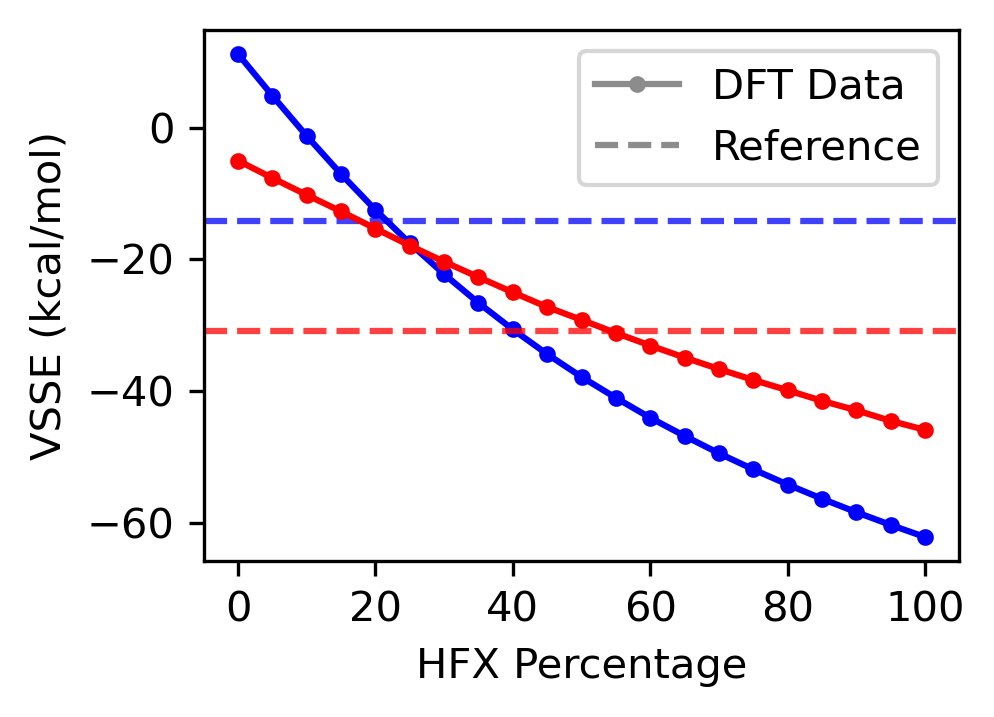

In [4]:
fig, ax = plt.subplots(figsize=(3.25, 2.3), dpi=300)

row = csd_pbe_sse.loc['Fe_AQIYII_comp_0_21111']
keys = [key for key in row.keys() if not np.isnan(row[key])]
values = [row[key] for key in row.keys() if not np.isnan(row[key])]
ax.plot(keys, values, '-', color='#0000FF', marker='o', ms=3) #, label='AQIYII')
ax.axhline(csd_df.loc['Fe_AQIYII_comp_0_21111']['dlpno-CCSD_T.vertsse'], ls='--', color='#0000FF', alpha=0.75) #, label='Reference')

row = vss_scan_sse.loc['co/2/co_2_SH2-S-0-0_SH2-S-0-0_SH2-S-0-0_SH2-S-0-0_SH2-S-0-0_imidazole-N-2-0_4']
keys = [key for key in row.keys() if not np.isnan(row[key])]
values = [row[key] for key in row.keys() if not np.isnan(row[key])]
ax.plot(keys, values, '-', color='#FF0000', marker='o', ms=3)
ax.axhline(vss_df.loc['co_2_SH2-S-0-0_SH2-S-0-0_SH2-S-0-0_SH2-S-0-0_SH2-S-0-0_imidazole-N-2-0_4']['dlpno-CCSD_T.vertsse'], ls='--', color='#FF0000', alpha=0.75)

ax.set_ylabel('VSSE (kcal/mol)')
ax.set_xlabel('HFX Percentage')

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], ls='-', marker='o', ms=3, label='DFT Data', color='#8c8c8c'),
               Line2D([0], [0], ls='--', label='Reference', color='#8c8c8c')]
ax.legend(custom_lines, ['DFT Data', 'Reference'])